# Logistic Regression Classifier

In [1]:
import numpy as np
import pandas as pd

np.random.seed(409782)
label = "rating_label"
random_state_const = 10987

In [2]:
train = pd.read_csv(f"train_final.csv")
test = pd.read_csv(f"test_final.csv")

train_y = train.pop(label)
train_X = train
test_y = test.pop(label)
test_X = test

In [3]:
from sklearn import metrics

def report(a, b):
    reports = [
                metrics.accuracy_score(a, b), 
                metrics.precision_score(a, b, average="macro"),
                metrics.recall_score(a, b, average="macro"),
                metrics.f1_score(a, b, average="macro")
               ]
    return reports

### Model Selection

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=random_state_const, max_iter=10000)
possible_hyperparams = {'penalty': ['l2', 'none'], 'C':[i for i in range(1, 6)]}

grid_search = RandomizedSearchCV(logistic_classifier, possible_hyperparams, n_iter = 5, scoring=['accuracy','f1_macro'], refit=False, random_state=62)
grid_search.fit(train_X, train_y)

results = pd.DataFrame(grid_search.cv_results_)
results

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='non

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,13.889001,2.776665,0.004540,0.001812,l2,1,"{'penalty': 'l2', 'C': 1}",0.705691,0.704336,0.701626,...,0.001898,1,0.327137,0.346354,0.317650,0.301085,0.336383,0.325722,0.015579,5
1,18.422610,3.837924,0.002414,0.000120,l2,3,"{'penalty': 'l2', 'C': 3}",0.705149,0.701897,0.702168,...,0.001428,2,0.328183,0.346586,0.327028,0.304765,0.339599,0.329232,0.014236,3
2,14.206911,2.093419,0.003155,0.001386,l2,4,"{'penalty': 'l2', 'C': 4}",0.703794,0.701084,0.703252,...,0.001310,3,0.319786,0.346656,0.331069,0.300401,0.341678,0.327918,0.016575,4
3,16.662759,2.069537,0.004387,0.001643,none,5,"{'penalty': 'none', 'C': 5}",0.705420,0.699187,0.702981,...,0.002103,4,0.327674,0.345980,0.326158,0.304676,0.342058,0.329309,0.014559,1
4,16.830803,2.156268,0.004323,0.001827,none,3,"{'penalty': 'none', 'C': 3}",0.705420,0.699187,0.702981,...,0.002103,4,0.327674,0.345980,0.326158,0.304676,0.342058,0.329309,0.014559,1


### Model Validation

In [18]:
logis = LogisticRegression(random_state=10987, max_iter=10000, penalty='none')
logis.fit(train_X, train_y)
res = logis.predict(test_X)

In [19]:
report(res, test_y)

[0.7062649035334922,
 0.3546698700135608,
 0.5902806062981435,
 0.32462510335912337]

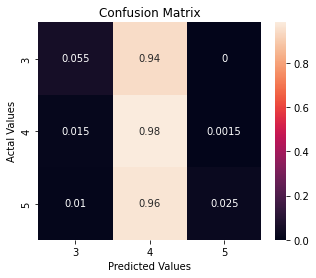

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_y, res)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['3','4','5'], 
                     columns = ['3','4','5'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Model Prediction

In [21]:
predict_X = pd.read_csv("predict_final.csv")
predictions = pd.Series(logis.predict(predict_X))
csv_file = pd.DataFrame(predictions, columns=[label])
csv_file.insert(0, "id", predictions.index + 1)
csv_file.to_csv("logistic_output.csv", index=False)